<a href="https://colab.research.google.com/github/sokhan1/PYTHON/blob/main/ANN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Artificial Neuron Network

In [15]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot
print(tf.__version__)

2.17.0


In [16]:
x_data = [[0,0],
          [0,1],
          [1,0],
          [1,1],]

y_data = [[0],
          [1],
          [1],
          [0],
]

x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

print(x_data.shape, y_data.shape)

(4, 2) (4, 1)


In [17]:
# Define model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [18]:
#model build => hypothesis
model = Sequential()
model.add(Dense(2, activation = "sigmoid", input_dim=2)) #neuron=2
model.add(Dense(1, activation="sigmoid"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
#train = > cost_function, metric, optimizer

model.compile(optimizer= "SGD",
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

history = model.fit(x_data, y_data, epochs=1000, batch_size=32, verbose=0)

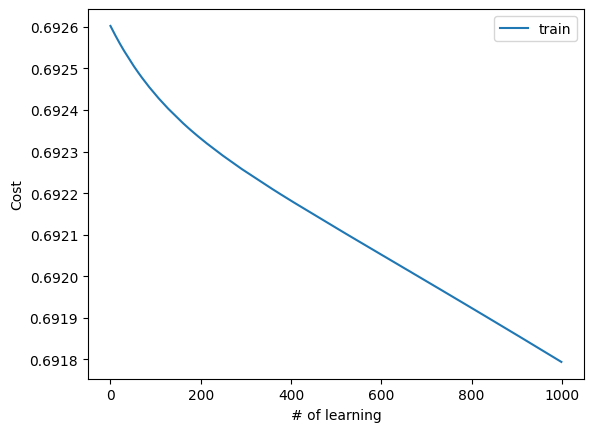

In [20]:
#Visualization

pyplot.plot(history.history['loss'], label='train')
pyplot.xlabel("# of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

In [21]:
# Evaluation & Predict
loss, train_acc = model.evaluate(x_data, y_data, verbose=0)
print(f"train_acc= {train_acc}")
print(f"loss={loss}")
predict = model.predict(x_data)
print(predict)

train_acc= 0.5
loss=0.6917932033538818
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
[[0.48983657]
 [0.4888104 ]
 [0.5202313 ]
 [0.51562023]]


#MNIST with ANN

In [22]:
from tensorflow.keras.datasets import mnist

In [23]:
(x_train, y_train),(x_test, y_test) = mnist.load_data() #Train / Test set 으로 mnist 데이터 할당
print(x_train.shape, y_train.shape, y_train[0])
print(x_test.shape, y_test.shape, y_test[0])

(60000, 28, 28) (60000,) 5
(10000, 28, 28) (10000,) 7


In [24]:
from tensorflow.keras.layers import Flatten

In [25]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           7,850 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             110 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,070 (31.52 KB)

 Trainable params: 8,070 (31.52 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer = "SGD",
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=16, verbose=1)

Epoch 1/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.3509 - loss: 2.1587
Epoch 2/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5986 - loss: 1.5113
Epoch 3/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6293 - loss: 1.1744
Epoch 4/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.6567 - loss: 1.0400
Epoch 5/5
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6619 - loss: 0.9629


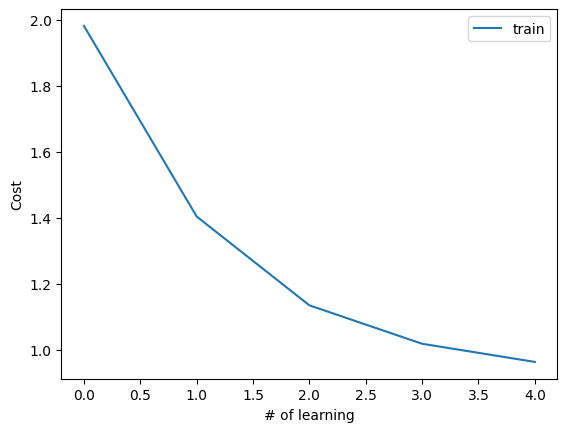

In [27]:
pyplot.plot(history.history['loss'],label='train')
pyplot.xlabel("# of learning")
pyplot.ylabel("Cost")
pyplot.legend()
pyplot.show()

In [29]:
loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"test_acc={test_acc}")
print(f"loss={loss}")

test_acc=0.6917999982833862
loss=0.8964605331420898
